In [1]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob


# Asthetics

In [2]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713"]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": 1., 'axes.linewidth':1., 
                                  "xtick.major.width":1.,"ytick.major.width":1.}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863)]

In [26]:

import matplotlib as mpl

def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return tuple((1 - mix) * c1 + mix * c2)

def gradientFader(c1, c2, n):
    n = n-1
    gradient = []
    for x in range(n + 1):
        gradient.append(colorFader(c1, c2, x / n))
    return gradient



In [27]:
df2 = pd.read_csv("FigureS22.csv")

/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_20724/1413121801.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#0C1713'` for the same effect.

  sns.stripplot(data = df2.query("Azide_1 == 'R'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),

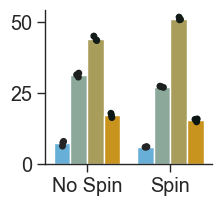

In [31]:
c1 = 'C0'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)
fig, ax = plt.subplots(figsize = (2.15,2), dpi = 100)
sns.despine(fig, top = True, right = True)

sns.stripplot(data = df2.query("Azide_1 == 'R'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)
sns.barplot(data = df2.query("Azide_1 == 'R' "), x = "Type", y = "value", errorbar=None, palette=gradient, hue = "variable", legend = False)

ax.set(xlabel = "", ylabel = "", yticks = np.linspace(0, 50, 3))


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_20724/2605502995.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#0C1713'` for the same effect.

  sns.stripplot(data = df2.query("Azide_1 == 'G'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),

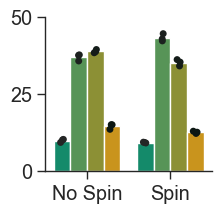

In [32]:

c1 = 'C1'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)
fig, ax = plt.subplots(figsize = (2.15,2), dpi = 100)
sns.despine(fig, top = True, right = True)

sns.stripplot(data = df2.query("Azide_1 == 'G'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)
sns.barplot(data = df2.query("Azide_1 == 'G' "), x = "Type", y = "value", errorbar=None, palette=gradient, hue = "variable", legend = False)

ax.set(xlabel = "", ylabel = "", yticks = np.linspace(0, 50, 3))


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_20724/3315077793.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#0C1713'` for the same effect.

  sns.stripplot(data = df2.query("Azide_1 == 'C'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),

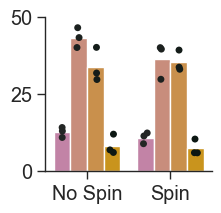

In [33]:
c1 = 'C2'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)
fig, ax = plt.subplots(figsize = (2.15,2), dpi = 100)
sns.despine(fig, top = True, right = True)

sns.stripplot(data = df2.query("Azide_1 == 'C'"), x = "Type", y = "value", color = "#0C1713", hue = "variable", dodge=True, size = 5, legend = False)
sns.barplot(data = df2.query("Azide_1 == 'C' "), x = "Type", y = "value", errorbar=None, palette=gradient, hue = "variable", legend = False)

ax.set(xlabel = "", ylabel = "", yticks = np.linspace(0, 50, 3))
